<a href="https://colab.research.google.com/github/CEOApplepine/automated-procurement-insights/blob/main/Procurement_analytics_ggcollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Procurement Data Preview:


,PO_ID,Supplier,Category,Amount,Order_Date,Contract_ID
0,1001,ABC Ltd,Maintenance,5000,2025-01-15,C001
1,1002,XYZ Inc,Logistics,3000,2025-01-20,C002
2,1003,LMN Co,Maintenance,4500,2025-01-22,C003
3,1004,DEF Ltd,Logistics,2500,2025-01-25,C004


Maintenance Data Preview:


,Asset_ID,Work_Order_ID,Maintenance_Cost,Date,PO_ID
0,A01,WO001,2000,2025-01-20,1001
1,A02,WO002,1500,2025-01-23,1003
2,A03,WO003,1000,2025-01-26,1002
3,A04,WO004,1200,2025-01-28,1004



Total Procurement Spend: $15,000.00
Total Maintenance Spend: $5,700.00
Total Combined Spend: $20,700.00

Supplier Spend:


,Supplier,Total_Cost
0,ABC Ltd,7000
1,DEF Ltd,3700
2,LMN Co,6000
3,XYZ Inc,4000



Category Spend:


,Category,Total_Cost
0,Logistics,7700
1,Maintenance,13000



Supplier KPIs:


,Supplier,PO_Count,Avg_Spend_Per_PO,Maintenance_Percent
0,ABC Ltd,1,7000.0,28.571429
1,DEF Ltd,1,3700.0,32.432432
2,LMN Co,1,6000.0,25.000000
3,XYZ Inc,1,4000.0,25.000000


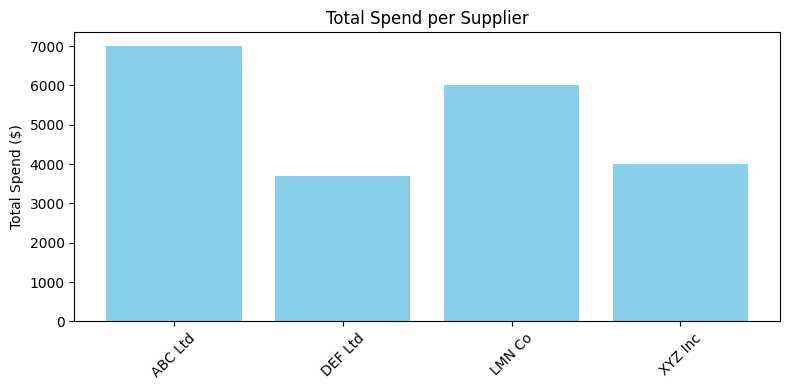

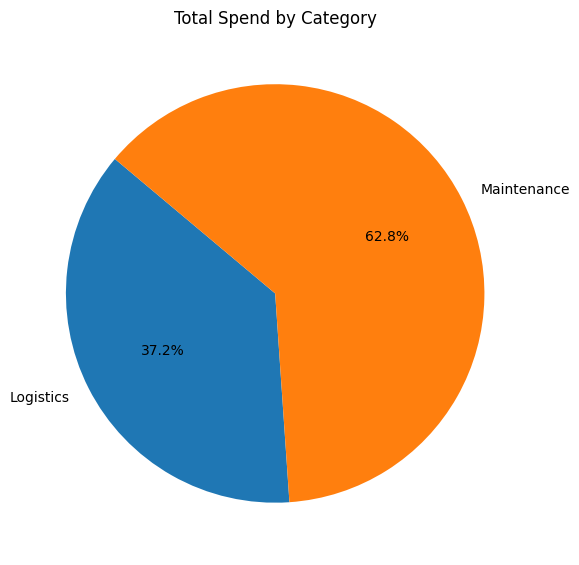


✅ Reports generated successfully in 'Reports/' folder and visuals in 'Visuals/' folder!


In [1]:
# ==========================================
# Automated Procurement Insights - Google Colab Ready
# ==========================================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 2: Create folders for outputs
os.makedirs("Reports", exist_ok=True)
os.makedirs("Visuals", exist_ok=True)

# Step 3: Load data from GitHub
procurement_url = "https://raw.githubusercontent.com/CEOApplepine/automated-procurement-insights/refs/heads/main/Data/oracle_procurement.csv"
maintenance_url = "https://raw.githubusercontent.com/CEOApplepine/automated-procurement-insights/refs/heads/main/Data/maximo_maintenance.csv"

procurement = pd.read_csv(procurement_url)
maintenance = pd.read_csv(maintenance_url)

print("Procurement Data Preview:")
display(procurement.head())
print("Maintenance Data Preview:")
display(maintenance.head())

# Step 4: Merge datasets
merged = pd.merge(procurement, maintenance, on='PO_ID', how='left')
merged['Maintenance_Cost'] = merged['Maintenance_Cost'].fillna(0)

# Step 5: Simulate Contract Setup
contracts = pd.DataFrame({
    'Contract_ID': ['C001','C002','C003'],
    'Supplier': ['ABC Ltd','XYZ Inc','LMN Corp'],
    'Start_Date': ['2025-01-01','2025-01-01','2025-01-01'],
    'End_Date': ['2025-12-31','2025-12-31','2025-12-31']
})
merged = pd.merge(merged, contracts, on='Supplier', how='left')

# Step 6: Calculate total cost per row
merged['Total_Cost'] = merged['Amount'] + merged['Maintenance_Cost']

# Step 7: Aggregate analytics
# Total spend
total_procurement = merged['Amount'].sum()
total_maintenance = merged['Maintenance_Cost'].sum()
total_spend = merged['Total_Cost'].sum()

print(f"\nTotal Procurement Spend: ${total_procurement:,.2f}")
print(f"Total Maintenance Spend: ${total_maintenance:,.2f}")
print(f"Total Combined Spend: ${total_spend:,.2f}")

# Spend by Supplier & Category
total_cost_supplier = merged.groupby('Supplier')['Total_Cost'].sum().reset_index()
total_cost_category = merged.groupby('Category')['Total_Cost'].sum().reset_index()

# KPI Metrics
po_count_supplier = merged.groupby('Supplier')['PO_ID'].nunique().reset_index(name='PO_Count')
avg_cost_supplier = merged.groupby('Supplier')['Total_Cost'].mean().reset_index(name='Avg_Spend_Per_PO')
merged_kpi = pd.merge(po_count_supplier, avg_cost_supplier, on='Supplier')
merged_kpi['Maintenance_Percent'] = merged.groupby('Supplier')['Maintenance_Cost'].sum().values / merged.groupby('Supplier')['Total_Cost'].sum().values * 100

# Step 8: Display results
print("\nSupplier Spend:")
display(total_cost_supplier)
print("\nCategory Spend:")
display(total_cost_category)
print("\nSupplier KPIs:")
display(merged_kpi)

# Step 9: Visualizations
# Supplier Spend Bar Chart
plt.figure(figsize=(8,4))
plt.bar(total_cost_supplier['Supplier'], total_cost_supplier['Total_Cost'], color='skyblue')
plt.title("Total Spend per Supplier")
plt.ylabel("Total Spend ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visuals/supplier_spend.png")
plt.show()

# Category Spend Pie Chart
plt.figure(figsize=(6,6))
plt.pie(total_cost_category['Total_Cost'], labels=total_cost_category['Category'], autopct='%1.1f%%', startangle=140)
plt.title("Total Spend by Category")
plt.tight_layout()
plt.savefig("Visuals/category_spend.png")
plt.show()

# Step 10: Export Excel report
with pd.ExcelWriter('Reports/procurement_report.xlsx') as writer:
    total_cost_supplier.to_excel(writer, sheet_name='Supplier_Spend', index=False)
    total_cost_category.to_excel(writer, sheet_name='Category_Spend', index=False)
    merged_kpi.to_excel(writer, sheet_name='Supplier_KPIs', index=False)
    merged.to_excel(writer, sheet_name='Merged_Data', index=False)

print("\n✅ Reports generated successfully in 'Reports/' folder and visuals in 'Visuals/' folder!")